It is said that for a soccer club to remain competitive over multiple years, they need to outspend other teams. How true is that statement? And is a club's expenditure the main determinant of performance? 

Using the fivethirtyeight power rankings(https://projects.fivethirtyeight.com/soccer-predictions/global-club-rankings/) and club expenditures over the last five years via transfermarkt(https://www.transfermarkt.com/statistik/einnahmenausgaben), the relationship between club expenditure and performance can be explored.

Transfermarkt data and the fivethirtyeight power rankings were scraped into 'Power Rankings + Expenditure.csv'. The format of the expenditures need to be changed to numerals.

In [26]:
import csv

with open('Power Rankings + Expenditure.csv') as csvfile:
    reader = csv.reader(csvfile)  
    data = list(reader)  

newValues = []

# change to numerals
for row in data[1:]:
    value = row[2]

    if "bn" in value:
        value.replace('â‚¬', '')
        value.replace('bn', '')

        value = ''.join(filter(str.isdigit, value))

        value = float(value)
        value = value * 10000000

    elif "m" in value:
        value.replace('â‚¬', '')
        value.replace('m', '')

        value = ''.join(filter(str.isdigit, value))

        value = float(value)
        value = value * 10000
    
    newValues.append(value)

# add to csv
for index, row in enumerate(data):
    if index == 0:
        row.append('Numerical Expenditure')
    else:
        row.append(newValues[index - 1])

with open('Power Rankings + Expenditure.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

Analysis of Club Expenditure and Ranking

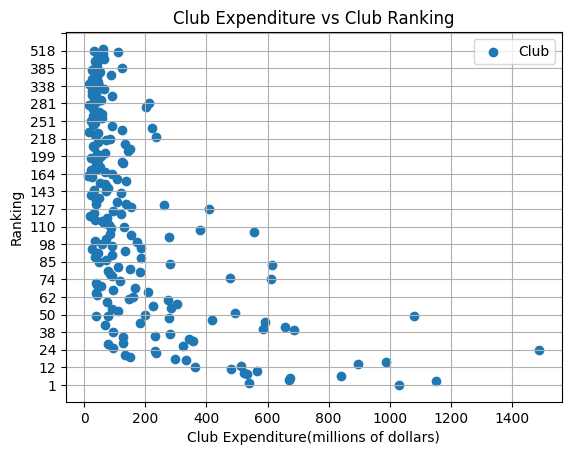

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# read CSV data into lists
xVals = []
yVals = []

with open('Power Rankings + Expenditure.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)

    for row in reader:
        xVals.append(float(row[3]) / 1000000)
        yVals.append(row[1])

# create scatterplot
customY_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80
                 , 90, 100, 110, 120, 130, 140, 150
                 , 160, 170, 180, 190, 200]

plt.scatter(xVals, yVals, label='Club')
plt.xlabel('Club Expenditure(millions of dollars)')
plt.ylabel('Ranking')
plt.title('Club Expenditure vs Club Ranking')
plt.legend()
plt.grid(True)
plt.yticks(customY_ticks)

plt.show()


There is a strong correlation between club expenditure and a club's global ranking. This means a club's expenditure is a strong determinant of their performance. However, expenditure is not a perfect determinant, meaning that other factors like coaching and good signings do impact a team's performance. Despite this, for a club to improve their performance and climb the global rankings, they do have to outspend those around them.